In [32]:
'''Read file'''
import numpy as np
file = open("D31.txt","r")
f1=[];f2=[];y=[]
while (True):    
    line = file.readline()
    if not line:
        break

    numbers = line.split()
    f1.append(float(numbers[0]))
    f2.append(float(numbers[1]))
    y.append(int(numbers[2]))
    
file.close()


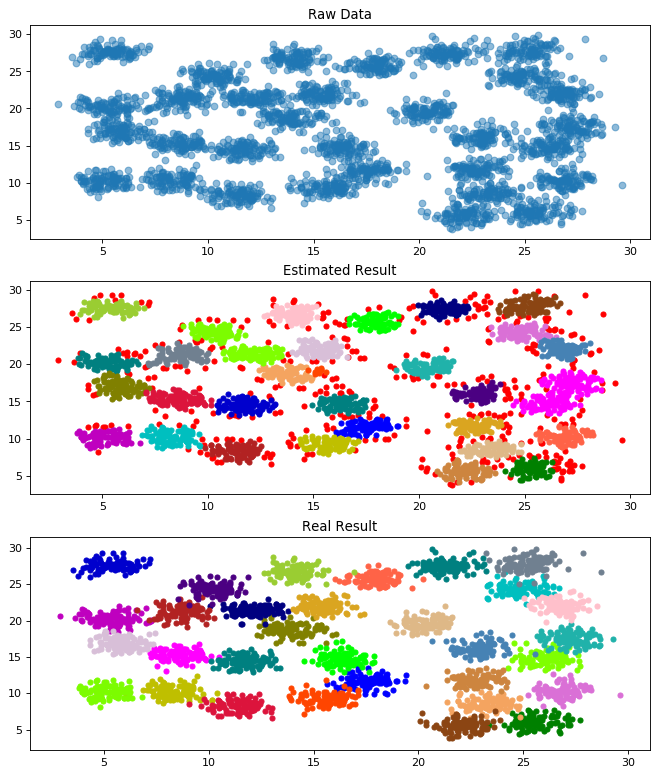

In [91]:
import numpy as numpy
import scipy as scipy
from sklearn import cluster
import matplotlib.pyplot as plt



def set2List(NumpyArray):
    list = []
    for item in NumpyArray:
        list.append(item.tolist())
    return list


def GenerateData():
    w=numpy.array(list(zip(f1,f2)))
    return w


def DBSCAN(Dataset, Epsilon,MinumumPoints,DistanceMethod = 'euclidean'):
#    Dataset is a mxn matrix, m is number of item and n is the dimension of data
    #m,n=Dataset.shape
    m=len(f1)
    n=2;
    Visited=numpy.zeros(m,'int')
    Type=numpy.zeros(m)
#   -1 noise, outlier
#    0 border
#    1 core
    ClustersList=[]
    Cluster=[]
    PointClusterNumber=numpy.zeros(m)
    PointClusterNumberIndex=1
    PointNeighbors=[]
    DistanceMatrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(Dataset, DistanceMethod))
    for i in range(m):
        if Visited[i]==0:
            Visited[i]=1
            PointNeighbors=numpy.where(DistanceMatrix[i]<Epsilon)[0]
            if len(PointNeighbors)<MinumumPoints:
                Type[i]=-1
            else:
                for k in range(len(Cluster)):
                    Cluster.pop()
                Cluster.append(i)
                PointClusterNumber[i]=PointClusterNumberIndex
                
                
                PointNeighbors=set2List(PointNeighbors)    
                ExpandClsuter(Dataset[i], PointNeighbors,Cluster,MinumumPoints,Epsilon,Visited,DistanceMatrix,PointClusterNumber,PointClusterNumberIndex  )
                Cluster.append(PointNeighbors[:])
                ClustersList.append(Cluster[:])
                PointClusterNumberIndex=PointClusterNumberIndex+1
                 
                    
    return PointClusterNumber 



def ExpandClsuter(PointToExapnd, PointNeighbors,Cluster,MinumumPoints,Epsilon,Visited,DistanceMatrix,PointClusterNumber,PointClusterNumberIndex  ):
    Neighbors=[]

    for i in PointNeighbors:
        if Visited[i]==0:
            Visited[i]=1
            Neighbors=numpy.where(DistanceMatrix[i]<Epsilon)[0]
            if len(Neighbors)>=MinumumPoints:
            #Neighbors merge with PointNeighbors
                for j in Neighbors:
                    try:
                        PointNeighbors.index(j)
                    except ValueError:
                        PointNeighbors.append(j)
                    
        if PointClusterNumber[i]==0:
            Cluster.append(i)
            PointClusterNumber[i]=PointClusterNumberIndex
    return


Data=GenerateData()



Epsilon=0.5
MinumumPoints=8

result =DBSCAN(Data,Epsilon,MinumumPoints)

fig = plt.figure(figsize=(10, 12), dpi=80) 

ax1=fig.add_subplot(3,1,1) #row, column, figure number
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.scatter(f1,f2, alpha =  0.5 )
ax1.set_title("Raw Data")

colors = ['r', 'g', 'b', 'y', 'c', 'm','orchid','teal','olive','tomato',
           'navy','sandybrown','chartreuse','orangered','lime','burlywood','magenta',
          'teal','lightseagreen','crimson','mediumblue','firebrick','yellowgreen','slategray',
          'pink','saddlebrown','steelblue','peru','indigo','goldenrod','lawngreen','thistle']
#fig, ax = plt.subplots()
for i in range(32):
        points = np.array([Data[j] for j in range(len(Data)) if result[j] == i])
        ax2.scatter(points[:, 0], points[:, 1], s=20, c=colors[i])
ax2.set_title("Estimated Result")

for i in range(1,32):
        points = np.array([Data[j] for j in range(len(y)) if y[j] == i])
        ax3.scatter(points[:, 0], points[:, 1], s=20, c=colors[i])
ax3.set_title("Real Result")
        
        
plt.show()

# Purity

In [90]:
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

purity =purity_score(y,result) 
print('Purity Score: {}'.format(purity))

Purity Score: 0.8387096774193549
